In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import matplotlib.cm as cm
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn import svm
import sklearn.linear_model as LM
import scipy.stats as st
from scipy.optimize import root,fsolve
from sklearn.feature_selection import  VarianceThreshold,SelectKBest,f_classif,chi2
from sklearn.feature_selection import RFE,RFECV,SelectFromModel
from sklearn.linear_model import Lasso,LassoCV,lasso_path,Ridge,RidgeCV
from sklearn.linear_model import enet_path,ElasticNetCV,ElasticNet

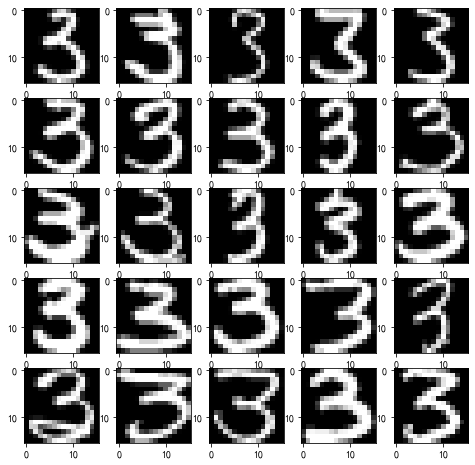

In [2]:
data=pd.read_table('邮政编码数据.txt',sep=' ',header=None)
tmp=data.loc[data[0]==3]
X=tmp.iloc[:,1:-1]
Y=tmp.iloc[:,0]
np.random.seed(1)
ids=np.random.choice(len(Y),25)
plt.figure(figsize=(8,8))
for i,item in enumerate(ids):
    img=np.array(X.iloc[item,]).reshape((16,16))
    plt.subplot(5,5,i+1)
    plt.imshow(img,cmap=cm.gray)
plt.show()

剩余变量个数：221


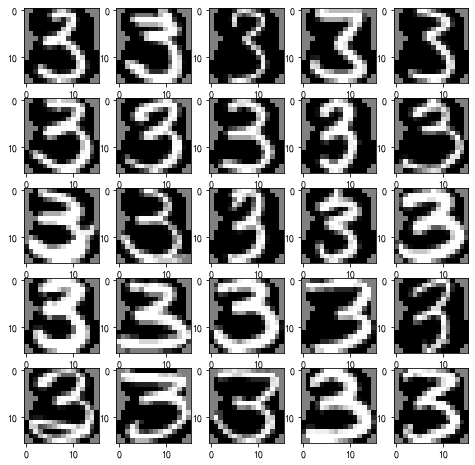

In [3]:
selector=VarianceThreshold(threshold=0.05)
selector.fit(X)
print("剩余变量个数：%d"%len(selector.get_support(True)))
X=selector.inverse_transform(selector.transform(X))
plt.figure(figsize=(8,8))
for i,item in enumerate(ids):
    img=np.array(X[item,]).reshape((16,16))
    plt.subplot(5,5,i+1)
    plt.imshow(img,cmap=cm.gray)
plt.show()

代码说明：
（1）第1，2行：定义低方差过滤法的对象，并拟合数据。
（2）第3行：显示特征选择的结果。
（3）第4行：基于低方差过滤结果，将所有低方差变量的变量值均替换为0，为后续直观展示低方差变量的具体情况做数据准备。
（4）第6至9行：利用for循环再次逐个展示25个经低方差过滤处理后的手写体数字3。